
# Project Overview
This Jupyter Notebook combines three key components of a data processing pipeline for gait analysis. 
Each section of the notebook is dedicated to a specific part of the process:

1. **Data Extraction**: Extracting and initial processing of gait data from a source file.
2. **Data Smoothing**: Applying smoothing techniques to the extracted data for better analysis.
3. **Leg Movement Analysis**: Analyzing leg movements from the smoothed data to understand gait patterns.

The notebook is structured to sequentially execute these steps, ensuring a streamlined workflow from raw data to analysis results.


In [10]:

# Required Libraries
%pip install pandas
%pip install numpypip 
%pip install matplotlib


Note: you may need to restart the kernel to use updated packages.
ERROR: Could not find a version that satisfies the requirement numpypip (from versions: none)
ERROR: No matching distribution found for numpypip
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


# Data Extraction
This section focuses on extracting gait data from a given source file. It involves loading the data, initial processing, and preparing it for further analysis.

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

class ExtractData:
    def __init__(self, file_name: str):
        """
        Initialize the ExtractData class with the specified file name.

        Args:
        file_name (str): The name of the file containing the gait analysis data.
        """
        self.file_name = file_name
        self.gait_data = None
        self.gait_data_df = None
        self.left_side_df = None
        self.right_side_df = None
        self.filtered_data = None
        self.time_ranges = None


    def load_data(self):
        """
        Use CSV file to create different dataframes, and print their contents.
        The column names for the Left and Right sides are assumed to be on the second row.
        """

        # Load the Excel file
        self.gait_data = pd.read_excel(self.file_name)

        # Creating the dataframe with the first three columns
        self.gait_data_df = self.gait_data.iloc[:, :3]
        print("\nGait Data Head:")
        print(self.gait_data_df.head())  # Display the first few rows of gait_data_df

        # Load the entire dataset, setting the second row as header
        self.gait_data = pd.read_excel(self.file_name, header=1)
        print("Second Data Head:")
        print(self.gait_data.head())  # Display the first few rows

        # Drop the first four columns from the gait_data
        self.gait_data = self.gait_data.iloc[:, 4:]

        # Collect the first four columns in self.left_side_df
        self.left_side_df = self.gait_data.iloc[:, :4].copy()

        # Drop rows with NaN values
        self.left_side_df.dropna(inplace=True)
        print("\n\nLeft Side Data Head:")
        print(self.left_side_df.head())  # Display the first few rows of left_side_df

        # Drop the first five columns from the gait_data (total drop is now nine columns)
        self.gait_data = self.gait_data.iloc[:, 5:]

        # Collect the first four columns in self.right_side_df
        self.right_side_df = self.gait_data.iloc[:, :4].copy()

        # Drop rows with NaN values
        self.right_side_df.dropna(inplace=True)
        print("\n\nRight Side Data Head:")
        print(self.right_side_df.head())  # Display the first few rows of right_side_df

        # Load the entire dataset, setting the first row as header
        self.gait_data = pd.read_excel(self.file_name, header=0)
        # print("Final Data Head:")
        # print(self.gait_data.head())  # Display the first few rows


    def filter_data(self):
        """
        Filter the data based on time ranges.
        """
        # Initialize an empty DataFrame for filtered data
        self.filtered_data = pd.DataFrame()

        # Loop through each time range in self.time_ranges
        for start, end in self.time_ranges:
            # Apply the filter for the current time range
            current_filtered = self.gait_data_df[(self.gait_data_df['Time (s)'] >= start) & (self.gait_data_df['Time (s)'] <= end)]

            # Combine the filtered data from the current time range with the previous ones
            self.filtered_data = pd.concat([self.filtered_data, current_filtered])

    def plot_roll(self, filtered_data: pd.DataFrame, filename: str):
        """
        Plot the data and save the plot to a file.

        Args:
        filtered_data (pd.DataFrame): The DataFrame containing the data to be plotted.
        filename (str): The name of the file to save the plot, including .png extension.
        """
        # Create a new figure with specific size
        plt.figure(figsize=(12, 6))

        # Plotting the 'Roll' against 'Time'
        plt.plot(filtered_data['Time (s)'], filtered_data['Roll (deg)'], label='Roll')

        # Setting the title of the plot
        plt.title('Roll vs Time')

        # Setting labels for x and y axes
        plt.xlabel('Time (s)')
        plt.ylabel('Roll (degrees)')

        # Enabling grid for better readability
        plt.grid(True)

        # Displaying the legend
        plt.legend()

        # Saving the plot to a file in PNG format
        plt.savefig(filename)

        # Closing the plot to free up memory
        plt.close()

    def plot_acceleration(self, filtered_data: pd.DataFrame, filename: str):
        """
        Plot the data and save the plot to a file.

        Args:
        filtered_data (pd.DataFrame): The DataFrame containing the data to be plotted.
        filename (str): The name of the file to save the plot, including .png extension.
        """
        # Create a new figure with specific size
        plt.figure(figsize=(12, 6))

        # Plotting the 'Forward Acceleration' against 'Time'
        plt.plot(filtered_data['Time (s)'], filtered_data['Forward Acceleration (cm/s^2)'], label='Forward Acceleration')

        # Setting the title of the plot
        plt.title('Forward Acceleration vs Time')

        # Setting labels for x and y axes
        plt.xlabel('Time (s)')
        plt.ylabel('Forward Acceleration (cm/s^2)')

        # Enabling grid for better readability
        plt.grid(True)

        # Displaying the legend
        plt.legend()

        # Saving the plot to a file in PNG format
        plt.savefig(filename)

        # Closing the plot to free up memory
        plt.close()


    def save_data(self, filtered_data: pd.DataFrame, filename: str):
        """
        Save the filtered data to a file.

        Args:
        filtered_data (pd.DataFrame): The DataFrame containing the data to be saved.
        filename (str): The name of the file to save the data, including file extension.
        """
        # Saving the DataFrame to a file
        filtered_data.to_csv(filename, index=False)


    def exec(self) -> tuple[pd.DataFrame, pd.Series]:
        """
        Execute the data extraction and processing flow and return the filtered data and missing data info.

        Returns:
        tuple: Contains the filtered data as a DataFrame and missing data information as a Series.
        """
        # self.add_labels()
        self.load_data()
        self.time_ranges = [(15, 19), (22, 26), (29, 32), (35, 38)]
        self.filter_data()
        self.plot_acceleration(self.filtered_data, 'filtered_acceleration.png')
        self.save_data(self.filtered_data, 'filtered_acceleration.csv')

        # self.add_labels()
        self.load_data()
        self.time_ranges = [(15.5, 19), (22.5, 26.5), (29, 33), (35, 39)]
        self.filter_data()
        self.plot_roll(self.filtered_data, 'filtered_roll.png')
        self.save_data(self.filtered_data, 'filtered_roll.csv')

# Example usage
extractor = ExtractData('Gait_Analysis_Example.xlsx')
extractor.exec()



Gait Data Head:
   Time (s)  Forward Acceleration (cm/s^2)  Roll (deg)
0 -1.086594                            -24    1.059973
1 -1.076598                            -24    1.045649
2 -1.066603                            -22    1.045649
3 -1.056607                             -9    1.045649
4 -1.046612                              0    1.059973
Second Data Head:
   -1.08659375  -24  1.05997281631276  Unnamed: 3  Toe-Off-Left  \
0    -1.076598  -24          1.045649         NaN        22.637   
1    -1.066603  -22          1.045649         NaN        23.843   
2    -1.056607   -9          1.045649         NaN        25.049   
3    -1.046612    0          1.059973         NaN        35.133   
4    -1.036617    3          1.059973         NaN        36.209   

   Heal-Down-Left  COM-Above-Heal-Left  COM-Above-Toe-Left  Unnamed: 8  \
0          23.050               23.367              23.542         NaN   
1          24.256               24.540              24.773         NaN   
2         

# Data Smoothing
In this section, the extracted data is smoothed using statistical methods. This is a crucial step to reduce noise and improve the reliability of the gait data analysis.

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter
import numpy as np

class SmoothData:
    def __init__(self, input_file_path: str, output_file_path: str):
        """
        Initialize the SmoothData class with input and output file paths.

        Args:
            input_file_path (str): The path to the CSV file containing the data to be processed.
            output_file_path (str): The path where the processed (smoothed) data will be saved.
        """
        self.input_file_path = input_file_path
        self.output_file_path = output_file_path
        self.filtered_data = None
        self.smoothed_data = None

    def load_data(self):
        """
        Load the data from the CSV file specified in the input_file_path attribute.
        The data is stored in the filtered_data attribute and the first few rows are printed.
        """
        self.filtered_data = pd.read_csv(self.input_file_path)
        print(self.filtered_data.head())


    def plot_data(self):
        """
        Plot the original and smoothed acceleration data.
        The plot is saved to a file named 'smoothed_data_plot.png' and then closed.
        """
        plt.figure(figsize=(12, 6))
        # plt.plot(self.filtered_data['Time (s)'], self.filtered_data['Forward Acceleration (cm/s^2)'], label='Original Acceleration')
        plt.plot(self.filtered_data['Time (s)'], self.filtered_data['Smoothed Acceleration'], label='Smoothed Acceleration', color='red')

        # Determine the range for vertical lines
        time_min = np.floor(min(self.filtered_data['Time (s)']))
        time_max = np.ceil(max(self.filtered_data['Time (s)']))
        
        # Add vertical lines at every whole number
        for x in np.arange(time_min, time_max + 1):
            plt.axvline(x, color='grey', linestyle='--', linewidth=0.5)

        # Determine the range for horizontal lines
        accel_min = np.floor(min(self.filtered_data['Smoothed Acceleration']) / 20) * 20
        accel_max = np.ceil(max(self.filtered_data['Smoothed Acceleration']) / 20) * 20

        # Add horizontal lines at every multiple of 20
        for y in np.arange(accel_min, accel_max + 20, 20):
            plt.axhline(y, color='grey', linestyle='--', linewidth=0.5)

        plt.title('Original vs. Smoothed Acceleration Data')
        plt.xlabel('Time (s)')
        plt.ylabel('Acceleration (cm/s^2)')
        plt.legend()
        plt.grid(True)
        plt.savefig('smoothed_data_plot.png')
        plt.show()
        plt.close()


    def exec(self):
        """
        Execute the main workflow of the SmoothData class.
        This method loads the data using load_data, smooths it, generates a plot of the data,
        and then saves the smoothed data to the output_file_path.
        """
        self.load_data()

        # Check if data is loaded
        if self.filtered_data is None:
            print("Data not loaded. Please check the input file path.")
            return

        # Smoothing the data
        self.filtered_data['Smoothed Acceleration'] = savgol_filter(
            self.filtered_data['Forward Acceleration (cm/s^2)'], window_length=51, polyorder=3
        )

        # Plotting the data
        self.plot_data()

        # Making a copy of the smoothed data and saving it
        self.smoothed_data = self.filtered_data.copy()
        self.smoothed_data.to_csv(self.output_file_path, index=False)


    Time (s)  Forward Acceleration (cm/s^2)  Roll (deg)
0  15.006079                             -8    4.583666
1  15.016075                           -106    4.669610
2  15.026070                           -242    4.812850
3  15.036066                           -391    4.999061
4  15.046061                           -495    5.170948


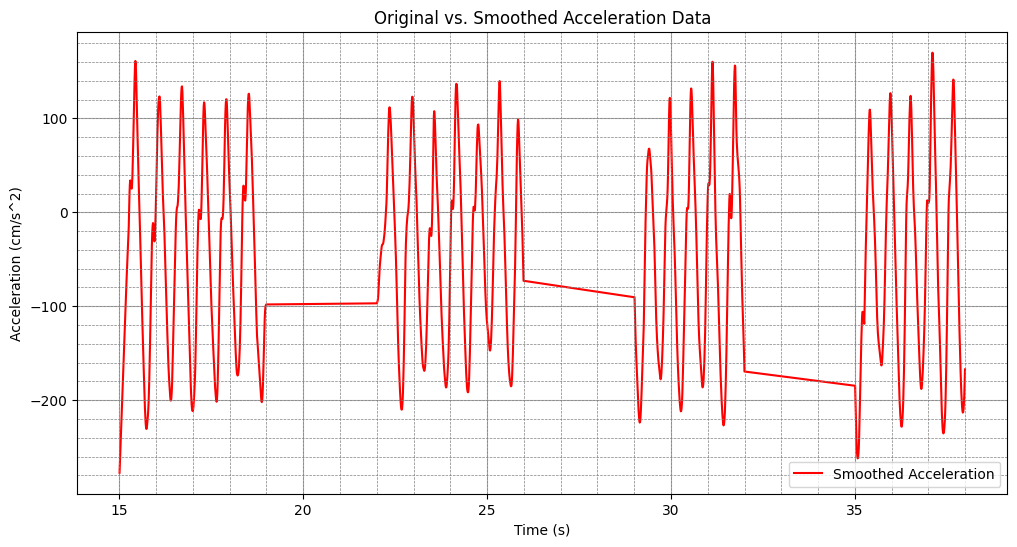

In [13]:

# Usage
input_file_path = 'filtered_acceleration.csv'
output_file_path = 'smoothed.csv'
smooth_data = SmoothData(input_file_path, output_file_path)
smooth_data.exec()


In [14]:
import pandas as pd
import matplotlib.pyplot as plt

class DetectEntries:
    def __init__(self, file_path: str):
        """
        Initialize the DetectEntries object by reading data from the given CSV file.
        
        Args:
        file_path (str): Path to the CSV file.
        """
        self.data = pd.read_csv(file_path)
        self.initialize_columns()

    def initialize_columns(self):
        """Initialize 'Braking' and 'Propulsion' columns with zeros."""
        self.data['Braking'] = 0
        self.data['Propulsion'] = 0

    def detect_entries(self):
        """
        Detect entries for 'Braking' and 'Propulsion' in the dataset.
        'Braking' is set when transitioning from above zero to zero or less.
        'Propulsion' is set when transitioning from below zero to zero or more.
        """
        for i in range(1, len(self.data)):
            if self.data['Smoothed Acceleration'].iloc[i-1] > 0 and self.data['Smoothed Acceleration'].iloc[i] <= 0:
                self.data.at[i, 'Braking'] = 1  # Using .at[] for label-based indexing
            if self.data['Smoothed Acceleration'].iloc[i-1] < 0 and self.data['Smoothed Acceleration'].iloc[i] >= 0:
                self.data.at[i, 'Propulsion'] = 1  # Using .at[] for label-based indexing

    def plot_data(self):
        """Plot the 'Braking' and 'Propulsion' data over time."""
        plt.figure(figsize=(10, 6))
        braking_times = self.data['Time (s)'][self.data['Braking'] == 1]
        plt.scatter(braking_times, [1] * len(braking_times), marker='|', color='r', label='Braking', s=100)
        propulsion_times = self.data['Time (s)'][self.data['Propulsion'] == 1]
        plt.scatter(propulsion_times, [1] * len(propulsion_times), marker='+', color='b', label='Propulsion', s=100)
        plt.title('Braking and Propulsion Over Time (s)')
        plt.xlabel('Time (s)')
        plt.ylabel('Indicator')
        plt.legend()
        plt.show()
        plt.close()

    def save_data(self, file_path: str):
        """
        Save the modified data to a new CSV file.
        
        Args:
        file_path (str): Path to the CSV file where the data will be saved.
        """
        self.data.to_csv(file_path, index=False)

    def exec(self):
        """
        Execute the methods to detect entries, plot data, and save the data.
        """
        self.detect_entries()
        self.plot_data()
        self.save_data('entry_data.csv')

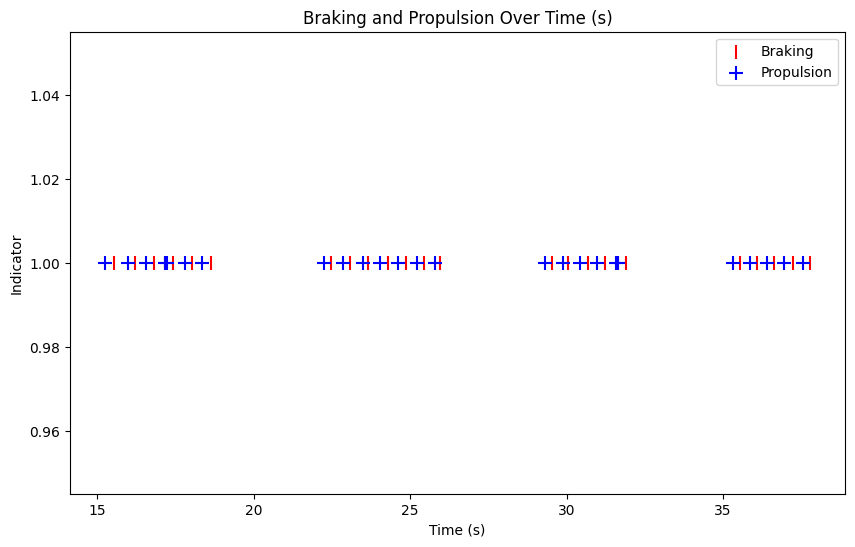

In [15]:

# Example of how to use the class
output_file_path = 'smoothed.csv'
detect_entries = DetectEntries(output_file_path)
detect_entries.exec()

    Time (s)  Forward Acceleration (cm/s^2)  Roll (deg)
0  15.006079                             -8    4.583666
1  15.016075                           -106    4.669610
2  15.026070                           -242    4.812850
3  15.036066                           -391    4.999061
4  15.046061                           -495    5.170948


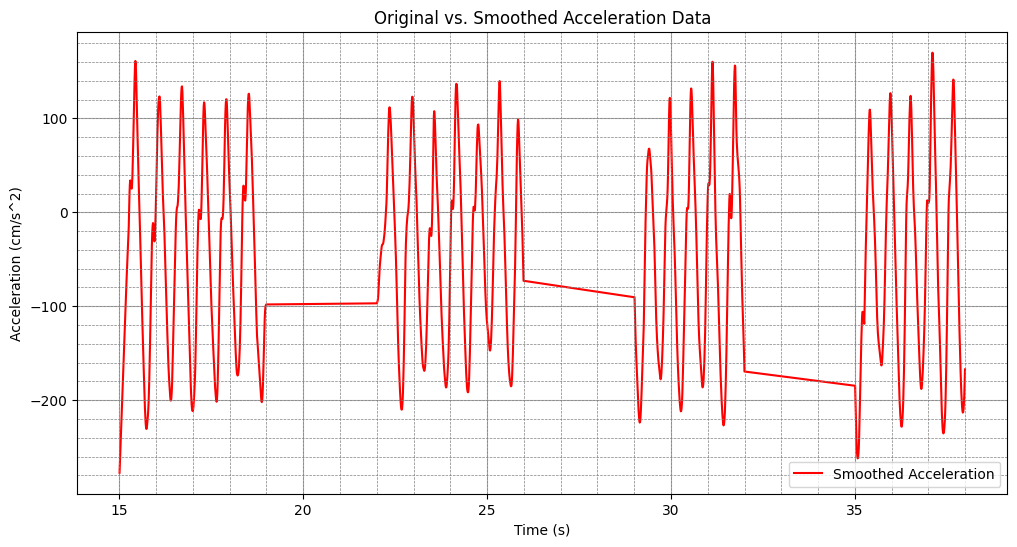

In [16]:
input_file_path = 'filtered_acceleration.csv'
output_file_path = 'smoothed.csv'
smooth_data = SmoothData(input_file_path, output_file_path)
smooth_data.exec()

# Leg Movement Analysis
The final section analyzes leg movements using the smoothed gait data. It aims to identify patterns and anomalies in gait, which are essential for understanding movement dynamics.

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

class Leg:
    """
    A class to analyze leg stance phases from roll angle data.

    Attributes:
        file_path (str): The path to the CSV file containing the data.
        data (pd.DataFrame): The loaded data from the CSV file.
    """

    def __init__(self, file_path: str):
        """
        Initialize the Leg class with the file path of the data.
        """
        self.file_path = file_path
        self.data = None

    def load_data(self):
        """
        Load data from the CSV file into a pandas DataFrame.
        """
        self.data = pd.read_csv(self.file_path)

    def detect_batches(self, time_column: str, gap_threshold: float = 1):
        """
        Detect batches in the data based on a specified time gap threshold.

        Args:
            time_column (str): The column name in the DataFrame that contains time data.
            gap_threshold (float): The threshold in time units to detect a new batch.
        """
        time_diff = self.data[time_column].diff()
        batch_indices = time_diff > gap_threshold
        self.data['Batch'] = np.cumsum(batch_indices).fillna(0)

    def mark_leg_in_segments(self, roll_column: str):
        """
        Mark which leg the subject is standing on during different segments.

        Args:
            roll_column (str): The column name in the DataFrame that contains roll angle data.
        """
        # Initialize and compute the required columns
        self.data['Leg'] = ''
        self.data['Roll_diff'] = self.data[roll_column].diff()

        # Process each batch separately
        for batch in self.data['Batch'].unique():
            batch_data = self.data[self.data['Batch'] == batch]

            # Identify right and left leg stance segments
            self._process_leg_segments(batch_data, roll_column)

    def _process_leg_segments(self, batch_data: pd.DataFrame, roll_column: str):
        """
        Helper method to process leg segments within a batch of data.

        Args:
            batch_data (pd.DataFrame): The data for the current batch.
            roll_column (str): The column name for roll angle data.
        """
        # Right Foot Down Segments
        right_start_indices = batch_data[(batch_data['Roll_diff'].shift(-1) > 0) & 
                                         (batch_data['Roll_diff'] <= 0) & 
                                         (batch_data[roll_column] < -1.5)].index
        for start_idx in right_start_indices:
            end_idx = batch_data.loc[start_idx:][batch_data['Roll (deg)'] >= 0].first_valid_index()
            if end_idx is not None:
                self.data.loc[start_idx:end_idx, 'Leg'] = 'Right'

        # Left Foot Down Segments
        left_start_indices = batch_data[(batch_data['Roll_diff'].shift(-1) <= 0) & 
                                        (batch_data['Roll_diff'] > 0) & 
                                        (batch_data[roll_column] > 2.5)].index
        for start_idx in left_start_indices:
            end_idx = batch_data.loc[start_idx:][batch_data['Roll (deg)'] <= 0].first_valid_index()
            if end_idx is not None:
                self.data.loc[start_idx:end_idx, 'Leg'] = 'Left'

    def plot_data(self):
        """
        Plot the roll angle data with colors indicating the stance leg.
        """
        plt.figure(figsize=(12, 6))

        # Plot each data point
        for index, row in self.data.iterrows():
            color = 'red' if row['Leg'] == 'Right' else 'black' if row['Leg'] == 'Left' else 'yellow'
            plt.scatter(row['Time (s)'], row['Roll (deg)'], color=color, s=5)

        plt.xlabel('Time (s)')
        plt.ylabel('Roll (deg)')
        plt.title('Roll Angle Over Time with Leg Stance Phases')
        plt.savefig('leg.png')
        plt.show()
        plt.close()


    def calculate_max_deviation(self) -> pd.DataFrame:
        """
        Calculate the maximum angular roll deviation for each contiguous set of rows
        during single leg stance phases.

        Returns:
            pd.DataFrame: A DataFrame containing the max deviation data for each stance segment.
        """
        max_deviation_data = []

        # Iterate through each batch
        for batch in self.data['Batch'].unique():
            batch_data = self.data[self.data['Batch'] == batch]

            # Process for each leg
            for leg in ['Right', 'Left']:
                leg_data = batch_data[batch_data['Leg'] == leg]

                # Find contiguous segments within the leg data
                # A segment changes when there is a break in the index sequence
                segments = leg_data['Roll (deg)'].groupby((leg_data.index.to_series().diff() != 1).cumsum())

                # Calculate max deviation for each segment
                for segment_num, segment_data in segments:
                    if not segment_data.empty:
                        time_start = segment_data.index.min()
                        time_end = segment_data.index.max()
                        max_deviation = segment_data.abs().max()

                        # Append this information to the max_deviation_data list
                        max_deviation_data.append({
                            'Batch': batch, 
                            'Leg': leg, 
                            'Segment': segment_num,
                            'Time Start': self.data.loc[time_start, 'Time (s)'],
                            'Time End': self.data.loc[time_end, 'Time (s)'],
                            'Max Deviation': max_deviation
                        })

        return pd.DataFrame(max_deviation_data)

    def save_data(self, output_file_path: str):
        """
        Save the modified data to a CSV file.

        Args:
            output_file_path (str): Path to save the output CSV file.
        """
        self.data.to_csv(output_file_path, index=False)

    def exec(self):
        """
        Execute the entire process of data loading, processing, plotting, and saving.
        """
        self.load_data()
        self.detect_batches('Time (s)')
        self.mark_leg_in_segments('Roll (deg)')
        self.plot_data()
        max_deviation_df = self.calculate_max_deviation()
        print('max_deviation_df')
        print(max_deviation_df)
        max_deviation_df.to_csv('max_deviation_data.csv', index=False)


/tmp/ipykernel_30497/1905815471.py:70: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  end_idx = batch_data.loc[start_idx:][batch_data['Roll (deg)'] >= 0].first_valid_index()
/tmp/ipykernel_30497/1905815471.py:70: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  end_idx = batch_data.loc[start_idx:][batch_data['Roll (deg)'] >= 0].first_valid_index()
/tmp/ipykernel_30497/1905815471.py:70: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  end_idx = batch_data.loc[start_idx:][batch_data['Roll (deg)'] >= 0].first_valid_index()
/tmp/ipykernel_30497/1905815471.py:79: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  end_idx = batch_data.loc[start_idx:][batch_data['Roll (deg)'] <= 0].first_valid_index()
/tmp/ipykernel_30497/1905815471.py:79: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  end_idx = batch_data.loc[start_idx:][batch_data['Roll (deg)'] <

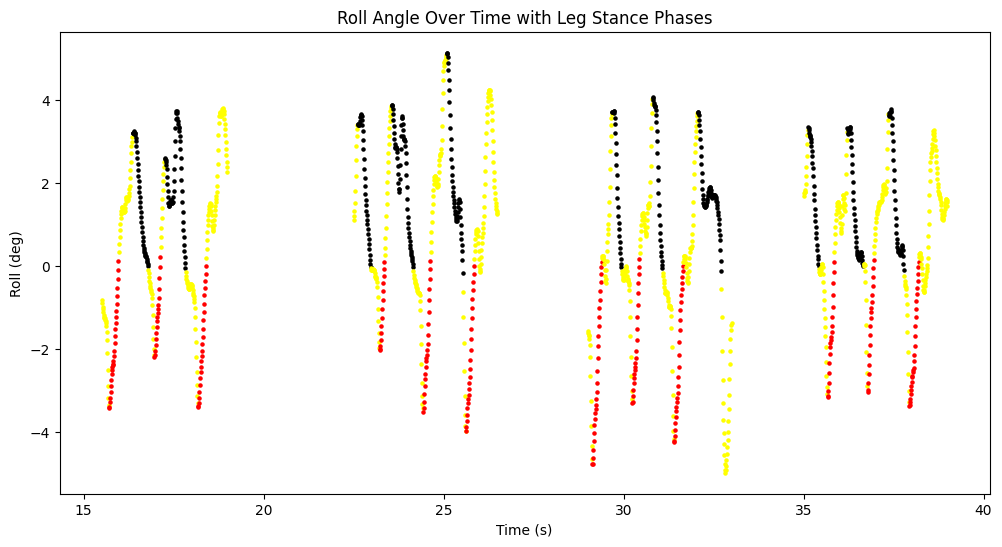

max_deviation_df
    Batch    Leg  Segment  Time Start   Time End  Max Deviation
0       0  Right        1   15.705761  15.965642       3.409102
1       0  Right        2   16.965187  17.125114       2.177241
2       0  Right        3   18.174637  18.394536       3.380454
3       0   Left        1   16.355465  16.785269       3.237214
4       0   Left        2   17.255055  17.824796       3.738553
5       1  Right        1   23.222338  23.352279       2.019678
6       1  Right        2   24.431788  24.631697       3.509369
7       1  Right        3   25.621246  25.841146       3.967736
8       1   Left        1   22.612616  22.972452       3.652609
9       1   Left        2   23.552188  24.151915       3.881792
10      1   Left        3   25.081492  25.531287       5.127977
11      2  Right        1   29.129649  29.389530       4.769878
12      2  Right        2   30.239144  30.439052       3.294510
13      2  Right        3   31.398616  31.648502       4.239891
14      2   Left       

In [18]:

# Usage
leg = Leg('filtered_roll.csv')
leg.exec()